In [1]:
import pandas as pd
import numpy as np
import requests
import os
import time
import json
import re
import matplotlib.pyplot as plt 
%matplotlib inline

## Gather

In [2]:
# load the twitter-archive-enhanced.csv into a DataFrame
archive_Data = pd.read_csv('twitter-archive-enhanced.csv')
archive_Data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# download the image prediction file from Udacity's server using the requests function
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open (url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [4]:
# load the image predictions data into a DataFrame
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


The following code is the Twitter API code supported by Udacity.

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)


# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = twitter_archive.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

The previous code should be used to gather data for the project,but the projrct resource provided this data for students who have diffecilty run previous code..

In [6]:
with open('tweet-json.txt', 'r') as f:
    tweet_json = pd.read_json(f, lines= True, encoding = 'utf-8')

# check the data
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [7]:
# check for the columns names 
tweet_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [8]:
# select the columns of interest : 'id', 'favorite_count','retweet_count'
tweet_json = tweet_json.loc[:,['id','favorite_count','retweet_count']]

# check for the top 5 rows
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


# Assess

### We have Three datasets archive_Data , image_predictions and tweet_json
#### First let's display one by one for visual assessing

##### 1- twitter-archive-enhanced data

In [9]:
# display twitter archive
archive_Data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
# display image_predictions
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
# display tweet_json
tweet_json

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


### Assessing of the data programmatically

In [12]:
# twitter_archive data info
archive_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
# statistic description of twitter archive
archive_Data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
# Random sample 
archive_Data.sample(22)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
881,760521673607086080,NaN,NaN,2016-08-02 17:04:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Doggo want what doggo cannot have. Temptation ...,NaN,NaN,NaN,https://vine.co/v/5ApKetxzmTB,12,10,None,doggo,None,None,None
2315,666691418707132416,NaN,NaN,2015-11-17 18:56:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Christoper. He is a spotted Penne. Can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666691418...,8,10,Christoper,None,None,None,None
870,761672994376806400,NaN,NaN,2016-08-05 21:19:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,None,None,None
153,862457590147678208,NaN,NaN,2017-05-11 00:01:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Jersey. He likes to watch movies, but ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/862457590...,13,10,Jersey,None,None,None,None
1160,724004602748780546,NaN,NaN,2016-04-23 22:38:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luther. He saw a ghost. Spooked af. 11...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724004602...,11,10,Luther,None,None,pupper,None
1842,675870721063669760,6.757073e+17,4.196984e+09,2015-12-13 02:51:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",&amp; this is Yoshi. Another world record cont...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675870721...,11,10,None,None,None,None,None
1620,684940049151070208,NaN,NaN,2016-01-07 03:30:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oreo. She's a photographer and a model...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684940049...,12,10,Oreo,None,None,None,None
1444,696713835009417216,NaN,NaN,2016-02-08 15:14:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Trevith. He's a Swiss Mountain Roadwoo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696713835...,9,10,Trevith,None,None,pupper,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None
166,859924526012018688,NaN,NaN,2017-05-04 00:15:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milky. She has no idea what happened. Jus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859924526...,12,10,Milky,None,None,None,None


In [15]:
# check for source column
archive_Data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
archive_Data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
archive_Data['tweet_id'].duplicated().any()

False

In [18]:
archive_Data.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [19]:
archive_Data['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Emanuel      1
Laela        1
Clyde        1
Rodman       1
Margo        1
Name: name, Length: 957, dtype: int64

In [20]:
# check for those written as lowercase
lowercase = archive_Data.name.loc[archive_Data.name.str.islower()].unique()
lowercase

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [21]:
# check any ratings include decimal numbers
archive_Data[archive_Data['text'].str.contains(r'(\d+\.\d+\/\d+)')]

/Users/maryam/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [22]:
# check for denominator values below 10
pd.set_option('display.max_colwidth',-1)
archive_Data.loc[archive_Data.rating_denominator <10 , ['text','rating_numerator','rating_denominator']]

<ipython-input-22-8c298438dd21>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


In [23]:
# check for rating denominator values > 10
archive_Data.loc[archive_Data.rating_denominator >10 ,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


In [24]:
# check for rating_numerator <10
archive_Data.loc[archive_Data.rating_numerator < 10,['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
229,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
387,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",7,10
462,RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,7,10
...,...,...,...
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10


In [25]:
np.sort(archive_Data['rating_numerator'].unique())

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776])

In [26]:
np.sort(archive_Data['rating_denominator'].unique())

array([  0,   2,   7,  10,  11,  15,  16,  20,  40,  50,  70,  80,  90,
       110, 120, 130, 150, 170])

In [27]:
archive_Data['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [28]:
archive_Data['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [29]:
# take a further look on the text column
archive_Data['text'].iloc[1000:1030]

1000    PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q                                              
1001    Pls don't send more sherks. I don't care how seemingly floofy they are. It does me so much frighten. Thank u. 11/10 https://t.co/oQqlOsla4R 
1002    This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
1003    This is Huxley. He's pumped for #BarkWeek. Even has a hat. Ears are quite magical. 11/10 would remove hat to pat https://t.co/V7h5NMYbYz    
1004    Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R  
1005    Other pupper asked not to have his identity shared. Probably just embarrassed about the headbutt. Also 12/10 it'll be ok mystery pup        
1006    This is Keurig. He apparently headbutts other dogs to greet them. Not cool Keurig. So fluffy tho 1

In [30]:
archive_Data.text.sample(10).tolist()

['Please enjoy this picture as much as I did. 12/10 https://t.co/7u8mM99Tj5',
 "This is Stanley. He has too much skin. Isn't happy about it. Quite pupset actually. Still 11/10 would comfort https://t.co/hhTfnPrWfb",
 "This is Rudy. He's going to be a star. 13/10 talented af (vid by @madalynrossi) https://t.co/Dph4FDGoMd",
 'This is Cassie. She goes door to door trying to find the owner of this baguette. No luck so far. 10/10 https://t.co/e8bj97CisO',
 "This is Dakota. He's just saying hi. That's all. 12/10 someone wave back https://t.co/1tWe5zZoHv",
 "Meet Darby. He's a Fiscal Tutankhamen Waxbeard. Really likes steak. 7/10 https://t.co/rSndxTL0Ap",
 'This is Titan. His nose is quite chilly. Requests to return to the indoors. 12/10 would boop to warm https://t.co/bLZuOh9sKy',
 'Meet Malikai. He was rolling around having fun when he remembered the inevitable heat death of the universe. 10/10 https://t.co/Vd2FqHIIGn',
 "This is Charlie. He wins every game of chess he plays. Won't let oppo

##### 2- image-predictions data

In [31]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [32]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1168,735991953473572864,https://pbs.twimg.com/media/CjbExRKUoAAs089.jpg,2,cocker_spaniel,0.961643,True,toy_poodle,0.011547,True,soft-coated_wheaten_terrier,0.004903,True
919,701889187134500865,https://pbs.twimg.com/media/Cb2cfd9WAAEL-zk.jpg,1,French_bulldog,0.902856,True,Staffordshire_bullterrier,0.022634,True,soap_dispenser,0.011973,False
1285,750719632563142656,https://pbs.twimg.com/media/CmsXg9AWgAAs6Ui.jpg,1,Pembroke,0.972587,True,Cardigan,0.014772,True,basenji,0.005798,True
1549,792913359805018113,https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg,4,web_site,0.226716,False,lighter,0.081941,False,switch,0.039009,False
1470,779123168116150273,https://pbs.twimg.com/media/CtAAYizW8AAWzBZ.jpg,1,toy_poodle,0.431080,True,soft-coated_wheaten_terrier,0.060365,True,cocker_spaniel,0.059845,True
158,668872652652679168,https://pbs.twimg.com/media/CUhQIAhXAAA2j7u.jpg,1,teddy,0.413379,False,pillow,0.325623,False,miniature_schnauzer,0.035537,True
996,708349470027751425,https://pbs.twimg.com/media/CdSQFWOWAAApgfq.jpg,1,muzzle,0.243890,False,basenji,0.187158,True,Boston_bull,0.092727,True
1517,787322443945877504,https://pbs.twimg.com/media/Cu0hlfwWYAEdnXO.jpg,1,seat_belt,0.747739,False,golden_retriever,0.105703,True,dingo,0.017257,False
1897,850380195714523136,https://pbs.twimg.com/ext_tw_video_thumb/850380153985355777/pu/img/lFouhg-EZvJs8eMr.jpg,1,Yorkshire_terrier,0.249012,True,Maltese_dog,0.166364,True,Shih-Tzu,0.142254,True
744,687480748861947905,https://pbs.twimg.com/media/CYpsFmIWAAAYh9C.jpg,1,English_springer,0.472273,True,English_setter,0.166862,True,Brittany_spaniel,0.163411,True


In [33]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [35]:
image_predictions['tweet_id'].duplicated().any()

False

In [36]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [37]:
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
                      .. 
espresso              1  
bookshop              1  
jersey                1  
padlock               1  
sea_urchin            1  
Name: p1, Length: 378, dtype: int64

##### 3- tweet_json data

In [38]:
tweet_json.sample(10)

,id,favorite_count,retweet_count
1853,675531475945709568,1276,428
723,782747134529531904,8310,1604
927,754482103782404096,5852,2220
2198,668655139528511488,562,233
2117,670417414769758208,604,350
1981,672964561327235073,1530,701
1545,689280876073582592,2197,819
1055,742150209887731712,5661,1783
664,790698755171364864,9158,2203
146,863432100342583297,24829,5664


In [39]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [40]:
tweet_json.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [41]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [42]:
# check for datasets shape and completeness
archive_Data.shape[0], image_predictions.shape[0], tweet_json.shape[0] 

(2356, 2075, 2354)

In [43]:
# duplicate columns in the three datasets
all_columns = pd.Series(list(archive_Data ) + list(image_predictions) + list(tweet_json))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

# Notes:
### Quality issues:
###### twitter-archive-enhanced

1- Datatybe: tweet_id column: is an "int" not a string (object)

2- Datatybe: in_reply_to_status_id, in_reply_to_user_id, retweeted_user_id ,and retweeted_status_id column:is a float insted of string (object) 

3-Datatybe: rating_numerator,rating_denominator columns is an "int"insted of a float

4-Missing records: in_reply_to_status_id, in_reply_to_user_id (78 instead of 2356)

5-Missing records: retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp (181 instead of 2356)

6-Missing records: expanded_urls ( 2297 instead of 2356)

7- Name column: none appears 745(missing data)

8- Name column: some names are wrong (O, a, the,an, not..)

9- Some text has decimal number and some has more than one rating , so it leads to wrong rating_numerator. 

###### image predictions 

10- Datatybe: tweet_id column: is an int not a string (object)
11- Dog breeds are not 'consistently' lower or upper



###### Tweet_json

11 - Datatybe: tweet_id column: is an int not a string (object)

### Tideness issues:

###### twitter-archive-enhanced

1- Text column has two variables text and short urls,should be split into Text and short_urls column.Then, drop expanded_urls

2- The values of four columns (doggo,floofer,pupper,puppo) should be in one column dog_type.

###### image predictions 
1- The dog breed p1 p2 p3 prediction could be represent as one column (Breed_prediction)

2-The prediction confidence could be represent as one column (prediction_confidence)

###### Tweet_json

1- tweet_json table should be part of the twitter-archive table


# Cleaning:

In [44]:
# make copies of the datasets
archive_Data_clean = archive_Data.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean =  tweet_json.copy()

### Missing Values

#### Define
Drop columns:
( 1- we just interested with column that are associated with tweets 2- drop column that almost does not give any valuble infomation, apperes as NaN) 

in_reply_to_status_id,
in_reply_to_user_id,
retweeted_status_id,
retweeted_status_user_id,
retweeted_status_timestamp.

#### Code

In [45]:
archive_Data_clean = archive_Data_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [46]:
archive_Data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Wrong Data
#### column name in Twitter_archive dataframe

#### Define
create a function that extracts the names from the Text column based on the observations made (such as 'name is' , 'that is' , 'this is'....)

#### Code

In [47]:
# clean this up

names = []

archive_Data_clean['text_split'] = archive_Data_clean['text'].str.split()
def extracted_names(row):
    
    # 'named '           
    if 'named' in row['text'] and re.match(r'[A-Z].*', row['text_split'][(row['text_split'].index('named') + 1)]): 
            names.append(row['text_split'][(row['text_split'].index('named') + 1)])
    
    # 'Here we have '
    elif row['text'].startswith('Here we have ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
            
    # 'This is '
    elif row['text'].startswith('This is ') and re.match(r'[A-Z].*', row['text_split'][2]):
            names.append(row['text_split'][2].strip('.').strip(','))
    
    # 'Say hello to '
    elif row['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
    
    # 'Meet '
    elif row['text'].startswith('Meet ') and re.match(r'[A-Z].*', row['text_split'][1]):
            names.append(row['text_split'][1].strip('.').strip(','))
            
    else:
        names.append('Nameless')
        
        
archive_Data_clean.apply(extracted_names, axis=1)

archive_Data_clean['names'] = names


In [48]:
archive_Data_clean['names'].value_counts()

Nameless    945
Charlie     11 
Lucy        11 
Oliver      10 
Cooper      10 
            .. 
Chelsea     1  
Rubio       1  
Cali        1  
Filup       1  
Margo       1  
Name: names, Length: 956, dtype: int64

In [49]:
# delete the created text_split column
archive_Data_clean.drop(['text_split'], axis=1, inplace=True)

In [50]:
archive_Data_clean.loc[archive_Data_clean['names'] == 'Nameless', 'names'] = None

#### Test 

In [51]:
archive_Data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
 12  names               1411 non-null   object
dtypes: int64(3), object(10)
memory usage: 239.4+ KB


### Wrong Data
#### Dog stage column ( pupper, puppo, floofer and doggo column)  in Twitter_archive dataframe

#### Define
create a function that extracts the names from the Text column based on (NaN if the word 'both' appears in a tweetwhich means that two dogs were rated and looking for the words puppo, doggo, pupper and floofer)

#### Code

In [52]:
dog_type = []

x = ['pupper', 'puppo', 'doggo', 'floof']
y = ['pupper', 'puppo', 'doggo', 'floof']

for row in archive_Data_clean['text']:
    row = row.lower()
    for word in x:
        if word in str(row):
            dog_type.append(y[x.index(word)])
            break
    else:
        dog_type.append('None')

archive_Data_clean['dog_type'] = dog_type

In [53]:
archive_Data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
 12  names               1411 non-null   object
 13  dog_type            2356 non-null   object
dtypes: int64(3), object(11)
memory usage: 257.8+ KB


In [54]:
archive_Data_clean['dog_type'].value_counts()


None      1905
pupper    283 
doggo     93  
puppo     38  
floof     37  
Name: dog_type, dtype: int64

In [55]:
# removing extra columns
archive_Data_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [56]:
# change dog_stage type to category
archive_Data_clean['dog_type'] = archive_Data_clean['dog_type'].astype('category')

#### Test

In [57]:
archive_Data_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'names', 'dog_type'],
      dtype='object')

In [58]:
archive_Data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2356 non-null   int64   
 1   timestamp           2356 non-null   object  
 2   source              2356 non-null   object  
 3   text                2356 non-null   object  
 4   expanded_urls       2297 non-null   object  
 5   rating_numerator    2356 non-null   int64   
 6   rating_denominator  2356 non-null   int64   
 7   name                2356 non-null   object  
 8   names               1411 non-null   object  
 9   dog_type            2356 non-null   category
dtypes: category(1), int64(3), object(6)
memory usage: 168.3+ KB


### Data type
#### tweet_id column 

#### Define
change tweet_id to string in all dataframe , timestamp to timedate , and rating_numerator to float 
in Twitter_archive table.

#### Code

In [59]:
archive_Data_clean['tweet_id'] = archive_Data_clean['tweet_id'].astype('object')

In [60]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype('object')

In [61]:
# rename the id column in twitter_json to tweet_id
tweet_json_clean.columns = ['tweet_id', 'favorite_count', 'retweet_count']

In [62]:
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('object')

In [63]:
archive_Data_clean['timestamp'] = pd.to_datetime(archive_Data_clean['timestamp'])

In [64]:
# change rating_numerator_new type from object to float
archive_Data_clean['rating_numerator'] = archive_Data_clean['rating_numerator'].astype('float')

#### Test

In [65]:
archive_Data_clean.info(), image_predictions_clean.info(),tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   float64            
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   names               1411 non-null   object             
 9   dog_type            2356 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(1), object(6)
memory usage: 168.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entri

(None, None, None)

### Wrong data

##### rating_numerator column in twitter_archive

#### Define
Extract the correct rating, include decimal numbers and some tweets include ratings for two dogs (treat them as NaN).

#### Code

In [66]:
id_list_twoDog_rating  = archive_Data_clean['tweet_id'][archive_Data_clean.text.str.contains
                                              ( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].tolist()
id_list_twoDog_rating

/Users/maryam/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


[881633300179243008,
 835246439529840640,
 802624713319034886,
 777684233540206592,
 775096608509886464,
 763167063695355904,
 747600769478692864,
 740373189193256964,
 722974582966214656,
 716439118184652801,
 714258258790387713,
 703356393781329922,
 695064344191721472,
 694352839993344000,
 691483041324204033,
 690400367696297985,
 689835978131935233,
 682962037429899265,
 677314812125323265,
 676191832485810177,
 674737130913071104,
 674646392044941312,
 673295268553605120,
 672248013293752320,
 671154572044468225,
 670434127938719744,
 669037058363662336,
 668537837512433665,
 667544320556335104,
 667491009379606528,
 667070482143944705,
 666835007768551424,
 666287406224695296]

In [67]:
# create a new column for the correct rating_numerator
archive_Data_clean['rating_numerator_corrected'] = archive_Data_clean['rating_numerator']

# replace wrong rating_numerator v with NaN for all tweets with two dog ratings
archive_Data_clean['rating_numerator_corrected'] = np.where(archive_Data_clean['tweet_id'].isin(id_list_twoDog_rating),
                                                         np.NaN, archive_Data_clean['rating_numerator_corrected'])

In [68]:
archive_Data_clean['rating_numerator_corrected'].isnull().sum()

33

In [69]:
archive_Data_clean['rating_numerator_corrected'].dtype

dtype('float64')

In [70]:
# all tweets with decimal numerators
id_list_decimal_rating = archive_Data_clean['tweet_id'][archive_Data_clean.text.str.contains( r'(\d+\.\d+)/(\d+)')].tolist()
id_list_decimal_rating

[883482846933004288,
 832215909146226688,
 786709082849828864,
 778027034220126208,
 681340665377193984,
 680494726643068929]

In [71]:
# create a list 
num_list_decimal_rating = archive_Data_clean['text'].str.extract( r'(\d+\.\d+)/(\d+)')[0].dropna().tolist()
# create a dictionary
num_dict = dict(zip(id_list_decimal_rating, num_list_decimal_rating))
num_dict

{883482846933004288: '13.5',
 832215909146226688: '9.75',
 786709082849828864: '9.75',
 778027034220126208: '11.27',
 681340665377193984: '9.5',
 680494726643068929: '11.26'}

In [72]:
# use the above dictionary to change the wrong rating  with the right one 
archive_Data_clean.loc[archive_Data_clean['tweet_id'].isin(num_dict.keys()),
                       'rating_numerator_corrected'] = archive_Data_clean['tweet_id'].map(num_dict)

#### Test

In [73]:
archive_Data_clean.loc[archive_Data_clean['rating_numerator']!=archive_Data_clean['rating_numerator_corrected']]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,names,dog_type,rating_numerator_corrected
45,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5.0,10,Bella,Bella,None,13.5
55,881633300179243008,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,17.0,10,None,None,None,NaN
313,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960.0,0,None,None,None,NaN
340,832215909146226688,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75.0,10,Logan,None,None,9.75
561,802624713319034886,2016-11-26 21:26:58+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ","https://twitter.com/dog_rates/status/777684233540206592/photo/1,https://twitter.com/dog_rates/status/777684233540206592/photo/1",12.0,10,None,None,None,NaN
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75.0,10,Logan,Logan,None,9.75
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27.0,10,Sophie,Sophie,pupper,11.27
766,777684233540206592,2016-09-19 01:42:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,12.0,10,None,None,None,NaN
784,775096608509886464,2016-09-11 22:20:06+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9.0,11,None,None,None,NaN
860,763167063695355904,2016-08-10 00:16:21+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,https://twitter.com/dog_rates/status/673295268553605120/photo/1,8.0,10,Eve,None,pupper,NaN


### Tideness 

#### Define
##### 1- Text column has two variables text and short urls,should be split into Text and short_urls column.Then, drop expanded_urls

In [74]:
# create urls column by use split method 
archive_Data_clean['urls'] = archive_Data_clean.text.apply(lambda x :x.strip().split(' ')[-1])
# drop the expanded_urls
archive_Data_clean.drop('expanded_urls', axis =1, inplace=True)
# split the text column by `https:` and assign its value to the same column name
archive_Data_clean.text = archive_Data_clean.text.apply(lambda x:x.split('https:')[0])

In [75]:
archive_Data_clean.sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,names,dog_type,rating_numerator_corrected,urls
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75.0,10,Logan,Logan,None,9.75,https://t.co/yBO5wuqaPS
1345,704491224099647488,2016-03-01 02:19:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13/10 hero af\n@ABC,13.0,10,None,None,None,13,af\n@ABC
2065,671151324042559489,2015-11-30 02:18:39+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",*struggling to breathe properly* 12/10,12.0,10,None,None,None,12,https://t.co/NKHx0pcOii


In [76]:
# check 
assert 'expanded_urls' not in archive_Data_clean.columns

###### Tidenee issue in image predictions Table
1- The dog breed p1 p2 p3 prediction could be represent as one column (Breed_prediction)

2-The prediction confidence could be represent as one column (prediction_confidence)

#### Define
Create a new colum (Breed_prediction) for the predicted dog breed (check p1 p2 p3 one by one,if the first prediction wasn't a dog breed, take the second and so on) and the confidence of the prediction as a second column( extract the prediction associeted with the chosen dog breed. 

#### Code

In [77]:
def Breed(row):
    if row['p1_dog']:
        return(row['p1'])
    elif row['p2_dog']:
        return(row['p2'])
    elif row['p3_dog']:
        return(row['p3'])
    else:
        return(np.NaN)

In [78]:
image_predictions_clean['Breed_predictions'] = image_predictions_clean.apply (lambda row: Breed (row),axis=1)

In [79]:
def Confidence(row):
    if row['p1_dog']:
        return(row['p1_conf'])
    elif row['p2_dog']:
        return(row['p2_conf'])
    elif row['p3_dog']:
        return(row['p3_conf'])
    else:
        return(np.NaN)

In [80]:
image_predictions_clean['prediction_confidence'] = image_predictions_clean.apply (lambda row: Confidence(row),axis=1)

#### Test

In [81]:
image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Breed_predictions,prediction_confidence
1965,867421006826221569,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,1,Eskimo_dog,0.616457,True,Siberian_husky,0.381330,True,malamute,0.001670,True,Eskimo_dog,0.616457
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True,borzoi,0.026660
828,693590843962331137,https://pbs.twimg.com/media/CaAhMb1XEAAB6Bz.jpg,1,dining_table,0.383448,False,grey_fox,0.103191,False,Siamese_cat,0.098256,False,NaN,NaN
1790,830097400375152640,https://pbs.twimg.com/media/C4UZLZLWYAA0dcs.jpg,4,toy_poodle,0.442713,True,Pomeranian,0.142073,True,Pekinese,0.125745,True,toy_poodle,0.442713
603,679844490799091713,https://pbs.twimg.com/media/CW9K9VeVAAE0j-x.jpg,1,Airedale,0.903832,True,Border_terrier,0.034713,True,toy_poodle,0.021378,True,Airedale,0.903832
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False,NaN,NaN
988,707776935007539200,https://pbs.twimg.com/media/CdKHWimWoAABs08.jpg,1,miniature_pinscher,0.890426,True,toy_terrier,0.051335,True,Chihuahua,0.018015,True,miniature_pinscher,0.890426
1776,828376505180889089,https://pbs.twimg.com/media/C378BwxWMAA6CNK.jpg,1,American_Staffordshire_terrier,0.523086,True,Staffordshire_bullterrier,0.186168,True,Chihuahua,0.042089,True,American_Staffordshire_terrier,0.523086
41,666701168228331520,https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg,1,Labrador_retriever,0.887707,True,Chihuahua,0.029307,True,French_bulldog,0.020756,True,Labrador_retriever,0.887707
1799,831670449226514432,https://pbs.twimg.com/media/C4qv3JUW8AADirb.jpg,1,Pembroke,0.624802,True,Cardigan,0.362861,True,Appenzeller,0.003926,True,Pembroke,0.624802


In [82]:
image_predictions_clean.drop(['p1', 'p1_dog','p1_conf', 'p2', 'p2_dog','p2_conf','p3','p3_dog','p3_conf'], axis=1, inplace=True)

In [83]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,Breed_predictions,prediction_confidence
124,668237644992782336,https://pbs.twimg.com/media/CUYOl0kW4AAVe_p.jpg,1,chow,0.809320
1648,808838249661788160,https://pbs.twimg.com/media/CzmSFlKUAAAQOjP.jpg,1,Rottweiler,0.369530
1789,829878982036299777,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1,golden_retriever,0.617389
1479,780800785462489090,https://pbs.twimg.com/media/CtX2Kr9XYAAuxrM.jpg,2,Siberian_husky,0.951963
1083,718460005985447936,https://pbs.twimg.com/media/Cfh7j6CWQAAndTd.jpg,1,Boston_bull,0.252781


In [84]:
# drop img_num column , it does not give any valuble information 
image_predictions_clean.drop(['img_num'], axis=1, inplace=True)

In [85]:
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'Breed_predictions', 'prediction_confidence'], dtype='object')

#### Data Quality : Breed_predictions in image_predictions table is not consistently lower or upper case 

#### Define 
Change the string to lowercase for Breed_predictions column.

In [96]:
image_predictions_clean['Breed_predictions'] = image_predictions_clean['Breed_predictions'].str.lower()

In [97]:
image_predictions_clean['Breed_predictions'].str.isupper().any()

False

## Merging the dataframes

#### Define
merge the three dataframe for matching Tweet_id using inner merge

#### Code

In [86]:
# use the merge function to merge archive_Data_clean and tweet_json_clean on tweet_id column 
master_data = pd.merge(archive_Data_clean, tweet_json_clean , how = 'inner' , on = 'tweet_id')

# use the merge function to merge archive_Data_clean and image_predictions_clean on tweet_id column (inner join) 
twitter_archive_master_data = pd.merge(master_data, image_predictions_clean , how = 'inner' , on = 'tweet_id')

#### Test

In [94]:
twitter_archive_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   object             
 1   timestamp                   2073 non-null   datetime64[ns, UTC]
 2   source                      2073 non-null   object             
 3   text                        2073 non-null   object             
 4   rating_numerator            2073 non-null   float64            
 5   rating_denominator          2073 non-null   int64              
 6   name                        2073 non-null   object             
 7   names                       1370 non-null   object             
 8   dog_type                    384 non-null    category           
 9   rating_numerator_corrected  2045 non-null   object             
 10  urls                        2073 non-null   object          

In [92]:
twitter_archive_master_data.loc[twitter_archive_master_data['names'] == 'Nameless', 'names'] = None
twitter_archive_master_data.loc[twitter_archive_master_data['Breed_predictions'] == 'Unidentifiable', 'Breed_predictions'] = None
twitter_archive_master_data.loc[twitter_archive_master_data['dog_type'] == 'None', 'dog_type'] = None
twitter_archive_master_data.loc[twitter_archive_master_data['prediction_confidence'] == 0.0, 'prediction_confidence'] = np.nan

In [95]:
# checking for duplicates
twitter_archive_master_data['tweet_id'].duplicated().any()

False

### Tideness issue:

#### Define
delete http web adderess from source column, Then change the datatype to category. 

#### Code:

In [111]:
twitter_archive_master_data['source'] = twitter_archive_master_data['source'].str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', 
                                                                       expand = True)[4];
twitter_archive_master_data['source'] = twitter_archive_master_data['source'].astype('category')

#### Test

In [113]:
twitter_archive_master_data.sample(1)

,tweet_id,timestamp,source,text,rating_denominator,names,dog_type,rating_numerator_corrected,urls,favorite_count,retweet_count,jpg_url,Breed_predictions,prediction_confidence
1820,670717338665226240,2015-11-28 21:34:09+00:00,Twitter for iPhone,*screams for a little bit and then crumples to the floor shaking* 12/10,10,None,NaN,12,https://t.co/W2MCt9pTed,1301,547,https://pbs.twimg.com/media/CU7d2vKUcAAFZyI.jpg,Pomeranian,0.368161


#### Finel step:drop unnecessary columns

In [102]:
columns = ['rating_numerator','name']
twitter_archive_master_data.drop(columns, axis =1, inplace=True)

In [103]:
twitter_archive_master_data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_denominator',
       'names', 'dog_type', 'rating_numerator_corrected', 'urls',
       'favorite_count', 'retweet_count', 'jpg_url', 'Breed_predictions',
       'prediction_confidence'],
      dtype='object')

### Storing the cleaned data 

In [170]:
# save the twitter_archive_master_data as csv
twitter_archive_master_data.to_csv('twitter_archive_master.csv', encoding = 'utf-8')


## Analyzing and Visualizing Data

In [171]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2073 non-null   int64  
 1   tweet_id                    2073 non-null   int64  
 2   timestamp                   2073 non-null   object 
 3   source                      2073 non-null   object 
 4   text                        2073 non-null   object 
 5   rating_denominator          2073 non-null   int64  
 6   names                       1370 non-null   object 
 7   dog_type                    384 non-null    object 
 8   rating_numerator_corrected  2045 non-null   float64
 9   urls                        2073 non-null   object 
 10  favorite_count              2073 non-null   int64  
 11  retweet_count               2073 non-null   int64  
 12  jpg_url                     2073 non-null   object 
 13  Breed_predictions           1750 

In [116]:
df.drop(['Unnamed: 0'], axis = 1)

,tweet_id,timestamp,source,text,rating_denominator,names,dog_type,rating_numerator_corrected,urls,favorite_count,retweet_count,jpg_url,Breed_predictions,prediction_confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,10,Phineas,NaN,13.0,https://t.co/MgUWQ76dJU,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",10,Tilly,NaN,13.0,https://t.co/0Xxu71qeIV,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,10,Archie,NaN,12.0,https://t.co/wUnZnhtVJB,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,10,Darla,NaN,13.0,https://t.co/tD36da7qLQ,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",10,Franklin,NaN,12.0,https://t.co/AtUZn91f7f,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,10,NaN,NaN,5.0,https://t.co/4B7cOc1EDq,111,41,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
2069,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,10,NaN,NaN,6.0,https://t.co/DWnyCjf2mx,311,147,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
2070,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,10,NaN,NaN,9.0,https://t.co/y671yMhoiR,128,47,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
2071,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,10,NaN,NaN,7.0,https://t.co/r7mOb2m0UI,132,48,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826


## Questions :
1- Which source is used the most by the followers?

2- which type of doge has the most ( tweets / retweets) by followers?

3-  What are the top 10 frequent predicted Dog Breeds?

4- what is the most common dog's name? 

### 1- Which source is used the most by the followers?

In [162]:
df['source'].value_counts()

Twitter for iPhone    2032
Twitter Web Client    30  
TweetDeck             11  
Name: source, dtype: int64

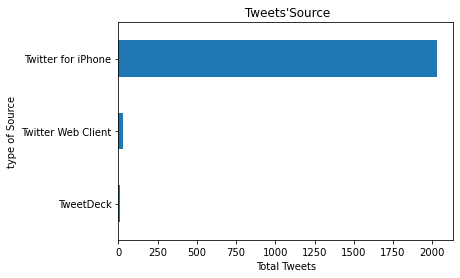

In [163]:
plt.title(" Tweets'Source")
df.source.value_counts().sort_values().plot(kind ='barh')
plt.xlabel('Total Tweets')
plt.ylabel('type of Source');

### 2- which type of doge has the most ( tweets / retweets) by followers?

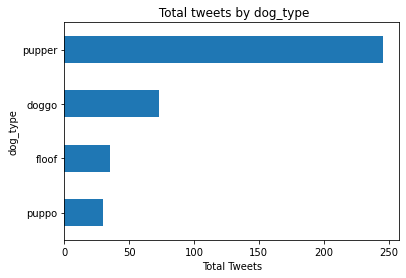

In [164]:
plt.title(" Total tweets by dog_type")
df.dog_type.value_counts().sort_values().plot(kind ='barh')
plt.xlabel('Total Tweets')
plt.ylabel('dog_type');

In [165]:
df.groupby('dog_type').retweet_count.sum().value_counts()

619903    1
545343    1
199575    1
103193    1
Name: retweet_count, dtype: int64

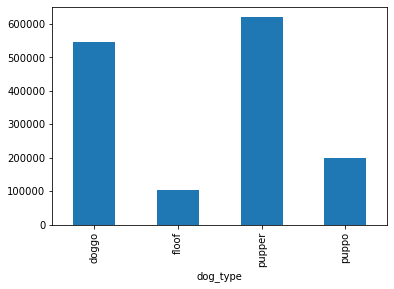

In [166]:
df.groupby('dog_type').retweet_count.sum().plot(kind ='bar')

### 3-  What are the top 10 frequent predicted Dog Breeds?

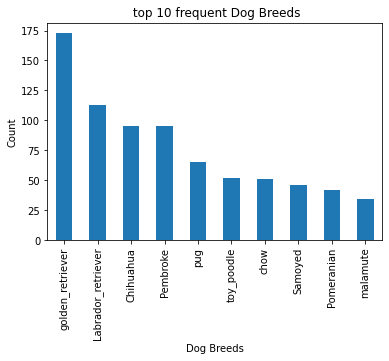

In [167]:
df.Breed_predictions.value_counts()[0:10].plot(kind='bar')
plt.title(' top 10 frequent Dog Breeds')
plt.xlabel('Dog Breeds')
plt.ylabel('Count');

### 4- what is the most common dog's name?

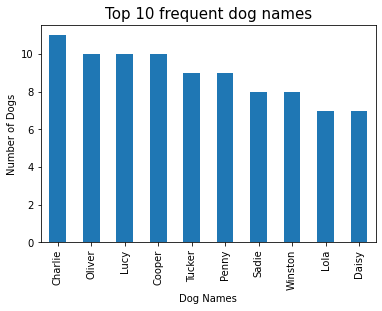

In [168]:
df['names'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Dogs')
plt.title('Top 10 frequent dog names', size=15)
plt.xlabel('Dog Names')
plt.savefig('most_frequent_names');

### References
https://mode.com/python-tutorial/counting-and-plotting-in-python/
https://www.educative.io/edpresso/three-ways-to-combine-dataframes-in-pandas?aid=5082902844932096&utm_source=google&utm_medium=cpc&utm_campaign=edpresso-dynamic&gclid=CjwKCAiAuoqABhAsEiwAdSkVVMckRS_OfFcloxEnUFvbEudoyLrldVuTHUp2XrrenNHqOgLFsS31aRoCiTgQAvD_BwE
https://github.com/sanjeevai/Wrangle_and_Analyze_data/blob/master/wrangle_act.ipynb
https://hindamosh.github.io/data_wrangling/